In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import andrews_curves
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy import stats
import matplotlib.patches as mpatches
red_wine=pd.read_csv("winequality-red.csv",sep=";")
white_wine=pd.read_csv("winequality-white.csv",sep=";")

In [39]:
#FUNCTIONS
#Frequency analysis for specific feature on both types
def freq(x):
    fig,axes=plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(10,4),facecolor="snow")
    wines.hist(column=x,by="type",ax=axes,color="crimson",edgecolor="black",linewidth=1)
    x=x.replace("_"," ")
    x=x.capitalize()
    fig.supxlabel(x)
    x+=" content in wines"
    plt.suptitle(x,x=0.5,y=1.05,ha="center",fontsize="x-large")
    fig.supylabel("Frequency")
    axes[0].set_title("Red Wines")
    axes[1].set_title("White Wines")
#Creates a boxplot for variables xy to z of winetype dataset. If out==False removes outliers
def boxplotter(x,y,z,winetype,out):
    fig, axes = plt.subplots(1,2, figsize=(10,10),facecolor="snow")
    temp=winetype[[z,x]]
    temp.boxplot(by=z, ax=axes[0],showfliers=out,color="dimgray");axes[0].set_title(""); axes[0].set_xlabel(z); axes[0].set_ylabel(x)
    temp=winetype[[z,y]]
    temp.boxplot(by=z, ax=axes[1],showfliers=out,color="dimgray");axes[1].set_title(""); axes[1].set_xlabel(z); axes[1].set_ylabel(y)
#Normalizes a dataset
def normalizer(df): 
    df=df.drop(["type","quality_label"],axis=1)
    scaler=MinMaxScaler()
    scaler.fit(df)
    scaled=scaler.fit_transform(df)
    scaled_df=pd.DataFrame(scaled,columns=df.columns)
    return scaled_df
#Takes a,b variables for x and y axis respectively; nor is a boolean value for normalization
def plotter(a,b,c,d,nor):
    if nor:
        c=normalizer(c)
        d=normalizer(d)
    fig, axes = plt.subplots(1,2, figsize=(14,7),facecolor="snow")
    x=sns.regplot(ax=axes[0],x=c[a],y=c[b],lowess=True,scatter_kws={"color":"crimson"},line_kws={"color":"black"})
    y=sns.regplot(ax=axes[1],x=d[a],y=d[b],lowess=True,scatter_kws={"color":"crimson"},line_kws={"color":"black"})
    return x,y
#Graphs relationship between x,y variables on df dataset
def rel_check(x,y,df):
    gg=sns.JointGrid(x=x,y=y,data=df)
    gg=gg.plot_joint(sns.regplot,color="crimson")
    gg=gg.plot_marginals(sns.histplot,kde=True,color="goldenrod")
    return gg
#Multigraphs kde,scatter and hist for all variables (It takes time)
def exp(df):
    pp = sns.PairGrid(df)
    pp = pp.map_upper(sns.kdeplot,cmap="hot",shade=True,thresh=False)
    pp = pp.map_diag(plt.hist,color="darkgrey")
    pp = pp.map_lower(sns.scatterplot,color="crimson",edgecolor="black")
    return pp
#Used for the removal of outliers
def correction(val,first,ninenine):
    if (val>=first)&(val<=ninenine):
        return val
    else:
        return np.NaN

In [3]:
#Fixed acidity refers to tartaric acid, the primary acid taste in wine, essential to mouthfeel and balance, adding an additional complexity to wine
#Citric acid is the fruity flavour. Adds some acidity, used less frequently due to the strong flavour and tendecy to break down to vinegar/ethanol.
#Volatile acidity is the gaseous acidic elements of a wine. Creates a vinegar/nail polish remover smell. Usualy undesirable

In [4]:
#There's a couple of strong relations:
#(Free SO2-Total SO2) (Alcohol-Density)
#Some more moderate relations:
#(Total SO2-Residual sugar)  (Density-Residual sugar)

#In general, we see that quality increases as alcohol, citric acid, total SO2, residual sugar increase
#Quality increases as chlorides, density and volatile acidity decrease
#Fixed acidity, pH, sulphates and free SO2 do not have a noticeable effect

#However, significant correlation exists only for alcohol, volatile acidity, total SO2 and chlorides.
#Quality increases as volatile acidity, total SO2 and chlorides decrease. Also when alcohol and increases, which is also
#directly corellated in similar way with the aforementioned features 

#The aforementioned observations were made for the combined wine dataset, and are the variables that have significant effect on both types

In [5]:
#Column renaming according to usual conventions
red_wine.columns=red_wine.columns.str.replace(" ","_")
white_wine.columns=white_wine.columns.str.replace(" ","_")
red_wine["type"]="red"
white_wine["type"]="white"
#Categorization of quality into three groups
red_wine["quality_label"] = red_wine["quality"].apply(lambda value: "low" if value <= 5 else "medium" if value <= 7 else "high")
white_wine["quality_label"]=white_wine["quality"].apply(lambda value: "low" if value<=5 else "medium" if value<=7 else "high")
red_wine["quality_label"]=pd.Categorical(red_wine["quality_label"],categories=["low","medium","high"])
white_wine["quality_label"]=pd.Categorical(white_wine["quality_label"],categories=["low","medium","high"])
#Useful user-created variables
labels=["Fixed acidity","Volatile acidity","Citric acid","Residual sugar","Chlorides","Free SO2","Total SO2","Density","pH","Sulphates","Alchohol","Quality"]

In [6]:
wines=pd.concat([red_wine,white_wine])
wines=wines.sample(frac=1,random_state=42).reset_index(drop=True)

In [7]:
#ANOVA
f,p=stats.f_oneway(wines[wines["quality_label"]=="low"]["alcohol"],
wines[wines["quality_label"]=="medium"]["alcohol"],
wines[wines["quality_label"]=="high"]["alcohol"])
print("ANOVA test for mean alcohol level across wine samples with different quality ratings")
print("F Statistic:",f,"\tp-value:",p)

ANOVA test for mean alcohol level across wine samples with different quality ratings
F Statistic: 673.0745347231032 	p-value: 2.2715337450621843e-266


In [8]:
conr=red_wine.describe().applymap("{:.2f}".format)
conw=white_wine.describe().applymap("{:.2f}".format)
keys=["Red Whine Statistics","White Wine Statistics"]
wines_sum=pd.concat((conr,conw),axis=0, keys=keys)
del conr,conw,keys
wines_sum

fixed_acidity volatile_acidity citric_acid  \
Red Whine Statistics  count       1599.00          1599.00     1599.00   
                      mean           8.32             0.53        0.27   
                      std            1.74             0.18        0.19   
                      min            4.60             0.12        0.00   
                      25%            7.10             0.39        0.09   
                      50%            7.90             0.52        0.26   
                      75%            9.20             0.64        0.42   
                      max           15.90             1.58        1.00   
White Wine Statistics count       4898.00          4898.00     4898.00   
                      mean           6.85             0.28        0.33   
                      std            0.84             0.10        0.12   
                      min            3.80             0.08        0.00   
                      25%            6.30             0.21        0.27   
                      50%            6.80             0.26        0.32   
                      75%            7.30             0.32        0.39   
                      max           14.20             1.10        1.66   

                            residual_sugar chlorides free_sulfur_dioxide  \
Red Whine Statistics  count        1599.00   1599.00             1599.00   
                      mean            2.54      0.09               15.87   
                      std             1.41      0.05               10.46   
                      min             0.90      0.01                1.00   
                      25%             1.90      0.07                7.00   
                      50%             2.20      0.08               14.00   
                      75%             2.60      0.09               21.00   
                      max            15.50      0.61               72.00   
White Wine Statistics count        4898.00   4898.00             4898.00   
                      mean            6.39      0.05               35.31   
                      std             5.07      0.02               17.01   
                      min             0.60      0.01                2.00   
                      25%             1.70      0.04               23.00   
                      50%             5.20      0.04               34.00   
                      75%             9.90      0.05               46.00   
                      max            65.80      0.35              289.00   

                            total_sulfur_dioxide  density       pH sulphates  \
Red Whine Statistics  count              1599.00  1599.00  1599.00   1599.00   
                      mean                 46.47     1.00     3.31      0.66   
                      std                  32.90     0.00     0.15      0.17   
                      min                   6.00     0.99     2.74      0.33   
                      25%                  22.00     1.00     3.21      0.55   
                      50%                  38.00     1.00     3.31      0.62   
                      75%                  62.00     1.00     3.40      0.73   
                      max                 289.00     1.00     4.01      2.00   
White Wine Statistics count              4898.00  4898.00  4898.00   4898.00   
                      mean                138.36     0.99     3.19      0.49   
                      std                  42.50     0.00     0.15      0.11   
                      min                   9.00     0.99     2.72      0.22   
                      25%                 108.00     0.99     3.09      0.41   
                      50%                 134.00     0.99     3.18      0.47   
                      75%                 167.00     1.00     3.28      0.55   
                      max                 440.00     1.04     3.82      1.08   

                             alcohol  quality  
Red Whine Statistics  count  1599.00  1599.00  
                   

<AxesSubplot:title={'center':'Distribution of wines based on colour'}, ylabel='type'>

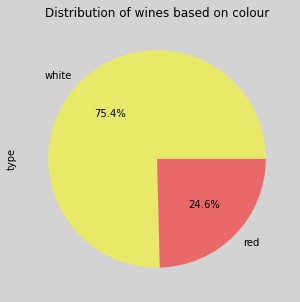

In [9]:
fig= plt.subplots(figsize=(5,5),facecolor="lightgrey")
wines["type"].value_counts().plot(kind="pie", autopct="%.1f%%", wedgeprops={"alpha":0.5}, colors=["yellow","red"], title="Distribution of wines based on colour")

Text(0.5, 0, 'Wine quality')

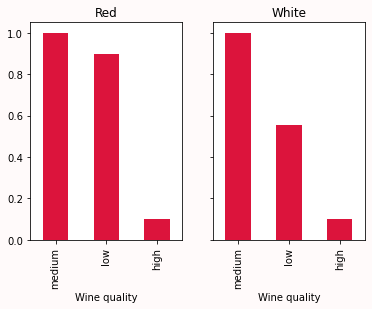

In [10]:
tempr=pd.DataFrame(data={"quality_label":["low","medium","high"],"count":red_wine.value_counts(subset="quality_label")})
tempw=pd.DataFrame(data={"quality_label":["low","medium","high"],"count":white_wine.value_counts(subset="quality_label")})
#Normalized for better understanding due to the radically different dataframe sizes
fig, axes = plt.subplots(1,2, sharey=True, squeeze=True, facecolor="snow")
tempr["count"]=preprocessing.minmax_scale(tempr["count"], feature_range=(0.1, 1))
tempw["count"]=preprocessing.minmax_scale(tempw["count"], feature_range=(0.1, 1))
tempr["count"].plot(kind='bar',ax=axes[0],color=["crimson"]); axes[0].set_title('Red'); axes[0].set_xlabel("Wine quality")
tempw["count"].plot(kind='bar',ax=axes[1],color=["crimson"]); axes[1].set_title('White'); axes[1].set_xlabel("Wine quality")

Text(0.65, 1.25, 'Red wine univariate plots')

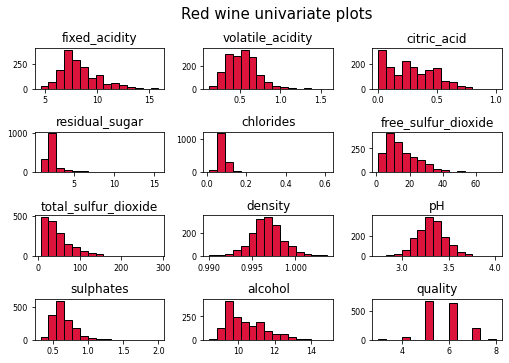

In [11]:
#Univariate frequency analysis for red wines
red_wine.hist(bins=15,color="crimson",edgecolor="black",linewidth=1,xlabelsize=8,ylabelsize=8,grid=False)
plt.tight_layout(rect=(0,0,1.2,1.2))
plt.suptitle("Red wine univariate plots",x=0.65,y=1.25,fontsize=15)

Text(0.65, 1.25, 'White wine univariate plots')

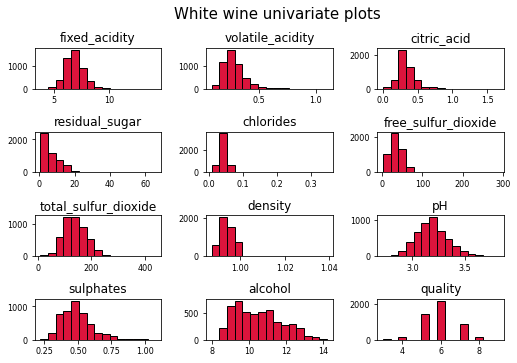

In [12]:
#Univariate frequency analysis for white wines
white_wine.hist(bins=15,color="crimson",edgecolor="black",linewidth=1,xlabelsize=8,ylabelsize=8,grid=False)
plt.tight_layout(rect=(0,0,1.2,1.2))
plt.suptitle("White wine univariate plots",x=0.65,y=1.25,fontsize=15)

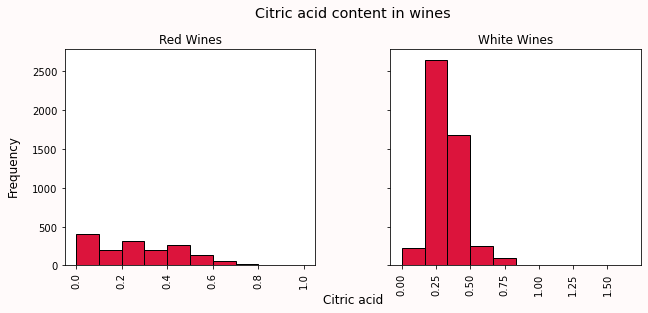

In [13]:
freq("citric_acid")

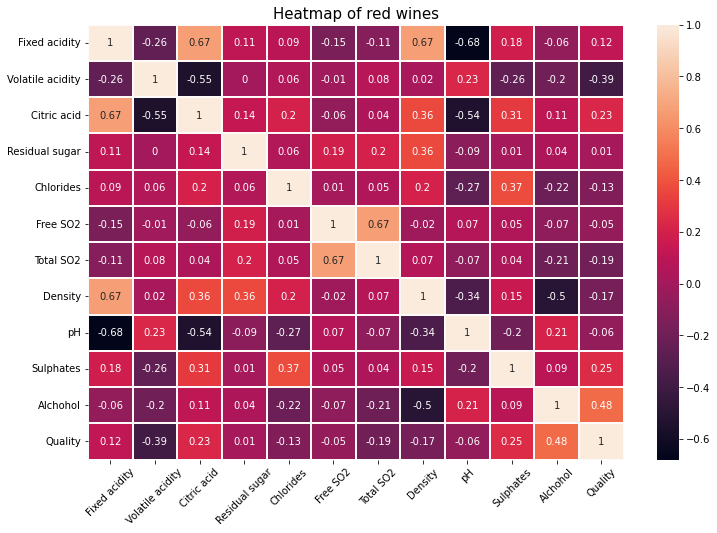

,quality
quality,1.000000
alcohol,0.476166
sulphates,0.251397
citric_acid,0.226373
fixed_acidity,0.124052
residual_sugar,0.013732
free_sulfur_dioxide,-0.050656
pH,-0.057731
chlorides,-0.128907
density,-0.174919


In [37]:
#Heatmap for red wines
plt.figure(figsize=(12,8))
sns.heatmap(red_wine.corr().round(2),color="k",linecolor="snow",linewidth=0.2,annot=True,yticklabels=labels,xticklabels=labels)
plt.xticks(rotation=45)
plt.title("Heatmap of red wines", fontsize=15)
plt.show()
red_wine.corr()[["quality"]].sort_values(by="quality",ascending=False)

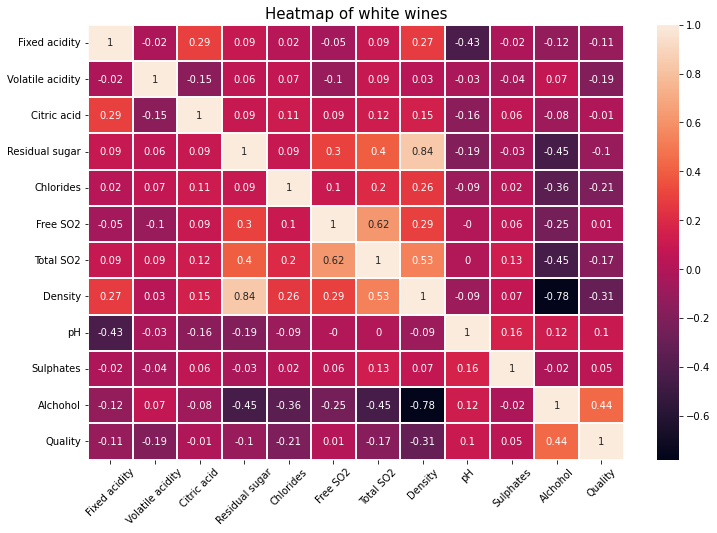

,quality
quality,1.000000
alcohol,0.435575
pH,0.099427
sulphates,0.053678
free_sulfur_dioxide,0.008158
citric_acid,-0.009209
residual_sugar,-0.097577
fixed_acidity,-0.113663
total_sulfur_dioxide,-0.174737
volatile_acidity,-0.194723


In [38]:
#Heatmap for white wines
plt.figure(figsize=(12,8))
sns.heatmap(white_wine.corr().round(2),color="k",linecolor="snow",linewidth=0.2,annot=True,yticklabels=labels,xticklabels=labels)
plt.xticks(rotation=45)
plt.title("Heatmap of white wines", fontsize=15)
plt.show()
white_wine.corr()[["quality"]].sort_values(by="quality",ascending=False)

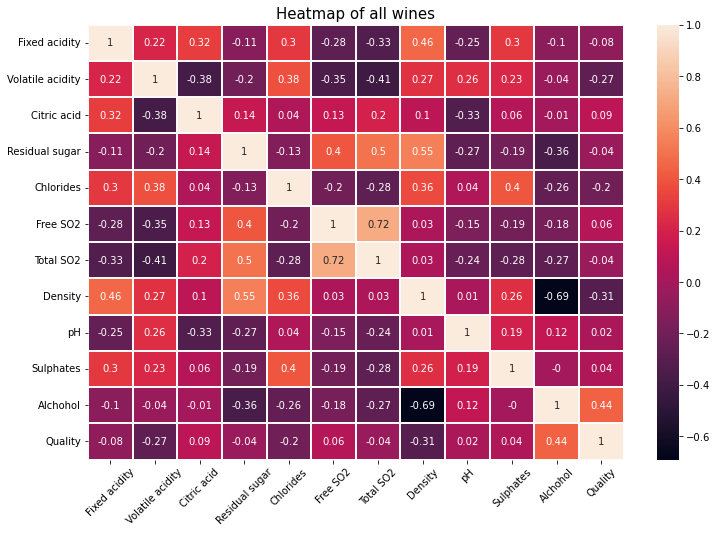

,quality
quality,1.000000
alcohol,0.444319
citric_acid,0.085532
free_sulfur_dioxide,0.055463
sulphates,0.038485
pH,0.019506
residual_sugar,-0.036980
total_sulfur_dioxide,-0.041385
fixed_acidity,-0.076743
chlorides,-0.200666


In [31]:
#Heatmap for all wines
plt.figure(figsize=(12,8))
sns.heatmap(wines.corr().round(2),color="k",linecolor="snow",linewidth=0.2,annot=True,yticklabels=labels,xticklabels=labels)
plt.xticks(rotation=45)
plt.title("Heatmap of all wines", fontsize=15)
plt.show()
#Alcohol, volatile acidity, density and chlorides influence a wine's quality
wines.corr()[["quality"]].sort_values(by="quality",ascending=False)

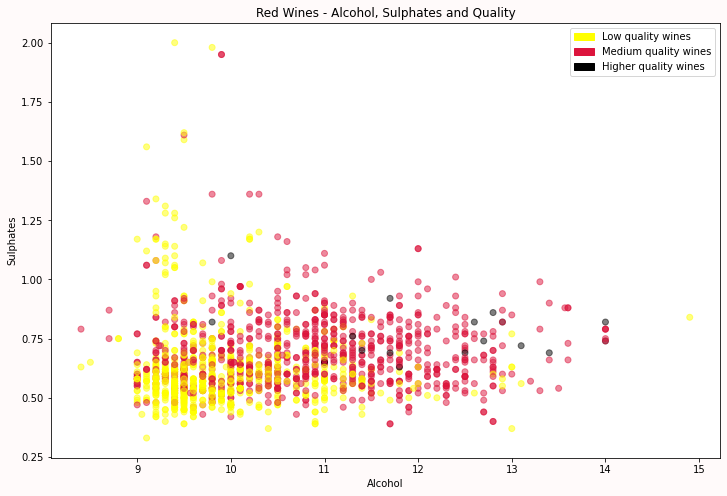

In [17]:
#Multivariate analysis with three features
colors={"low":"yellow","medium":"crimson","high":"black"}
fig,axes=plt.subplots(figsize=(12,8),facecolor="snow")
scatter=axes.scatter(red_wine["alcohol"],red_wine["sulphates"],c=red_wine["quality_label"].map(colors),alpha=0.5)
axes.set_xlabel("Alcohol",fontsize=10)
axes.set_ylabel("Sulphates",fontsize=10)
axes.set_title("Red Wines - Alcohol, Sulphates and Quality")
low_quality=mpatches.Patch(color="yellow",label="Low quality wines")
medium_quality=mpatches.Patch(color="crimson",label="Medium quality wines")
high_quality=mpatches.Patch(color="black",label="Higher quality wines")
axes.legend(handles=[low_quality,medium_quality,high_quality])
plt.show()

In [18]:
#exp(wines)

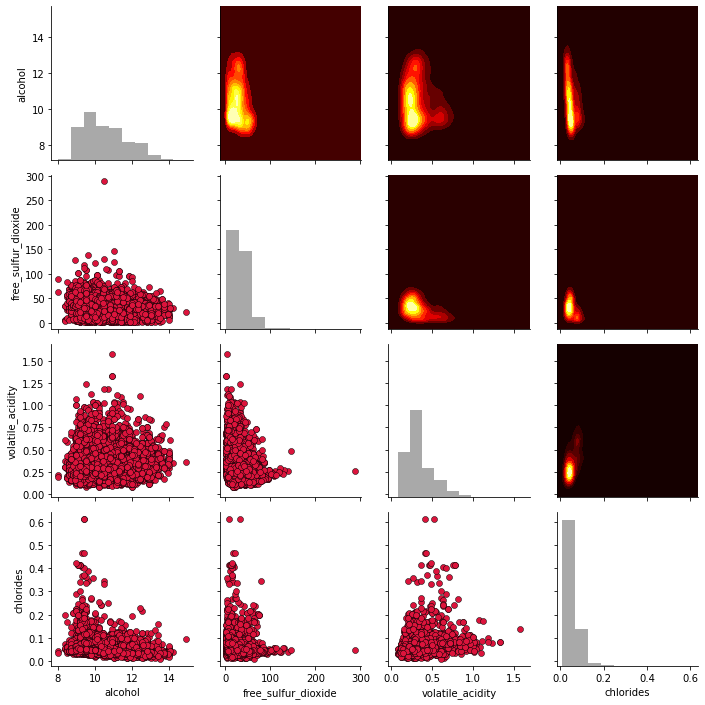

In [41]:
exp(wines[["alcohol","free_sulfur_dioxide","volatile_acidity","chlorides"]])

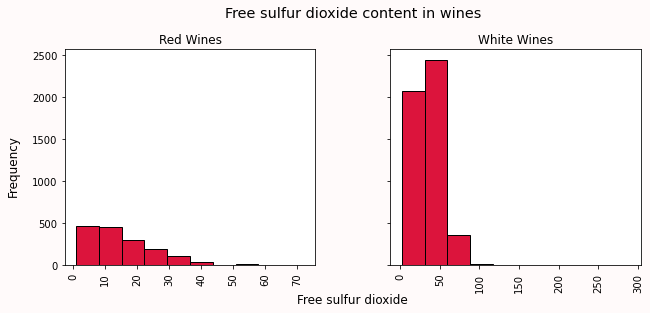

In [20]:
freq("free_sulfur_dioxide")

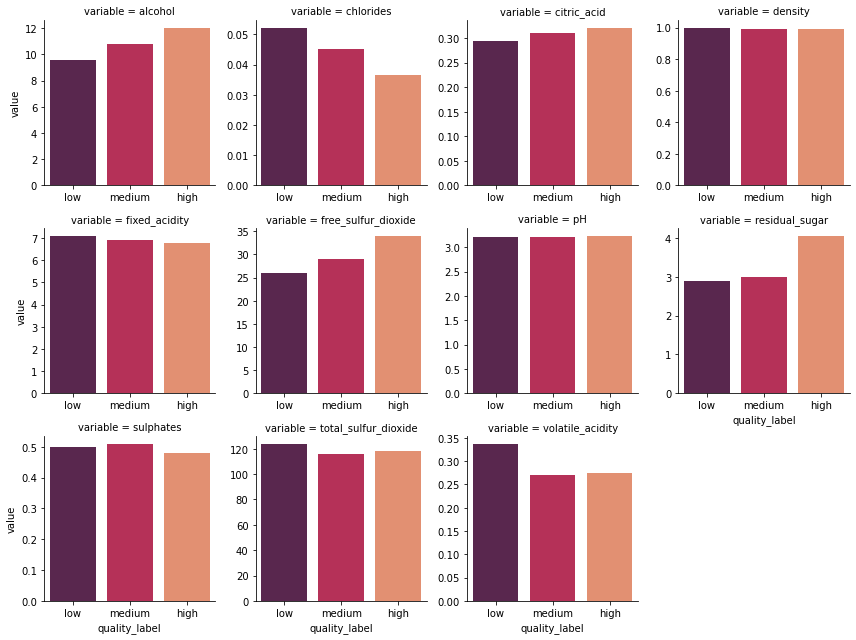

In [21]:
#Create a new dataframe g1, with quality and quality label columns serving as identifiers
g1=pd.melt(wines,id_vars=["quality","quality_label"],value_vars=wines.columns[:12],var_name="variable",value_name="value")
g1.sort_values(by=["variable","quality"],ascending=[True,True],inplace=True)
g1.reset_index(drop=True,inplace=True)
g1.quality=g1.quality.astype("str")
g1.quality=g1.quality.astype("category")
#Create histplots for every variable binned by quality label
g1=g1.groupby(by=["variable","quality_label"],as_index=False)[["value"]].median()
pp=sns.FacetGrid(g1,col="variable",col_wrap=4,sharey=False,sharex=False,height=3,aspect=1,
hue="quality_label",hue_order=["low","medium","high"],palette="rocket")
pp.map(sns.barplot,"quality_label","value",order=["low","medium","high"])
plt.show()

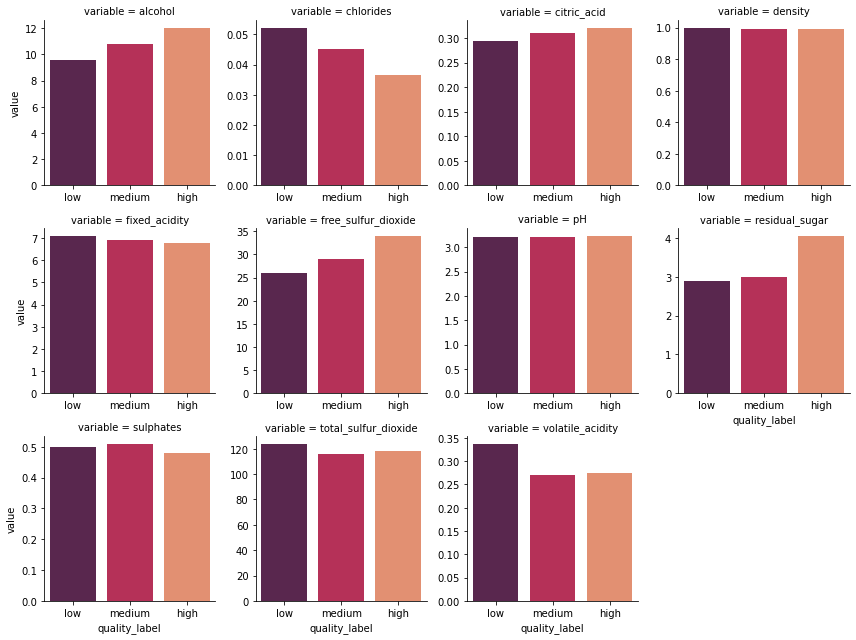

In [22]:
#Let's do the same after removing the top and bottom 1%
g2=pd.melt(wines,id_vars=["quality","quality_label"],value_vars=wines.columns[:12],var_name="variable",value_name="value")
g2.sort_values(by=["variable","quality"],ascending=[True,True],inplace=True)
g2.reset_index(drop=True,inplace=True)
g2.quality=g2.quality.astype("str")
g2.quality=g2.quality.astype("category")
#Start of removal process
q1=g2.groupby(["quality","variable"],as_index=False)[["value"]].quantile(0.1)
q1.rename(columns={"value":"1%"},inplace=True)
q99=g2.groupby(["quality","variable"],as_index=False)[["value"]].quantile(.99)
q99.rename(columns={"value":"99%"},inplace=True)
g2=g2.merge(q1,on=["quality","variable"]).merge(q99,on=["quality","variable"])
g2["correction"]=g2.apply(lambda x: correction(x["value"],x["1%"],x["99%"]),axis=1)
g2=g2[["quality","quality_label","variable","value"]]
#End of process
g2=g2.groupby(by=["variable","quality_label"],as_index=False)[["value"]].median()
pp=sns.FacetGrid(g2,col="variable",col_wrap=4,sharey=False,sharex=False,height=3,aspect=1,
hue="quality_label",hue_order=["low","medium","high"],palette="rocket")
pp.map(sns.barplot,"quality_label","value",order=["low","medium","high"])
plt.show()

In [23]:
#Having done all that we can check the correlation for each pair of significant value to quality

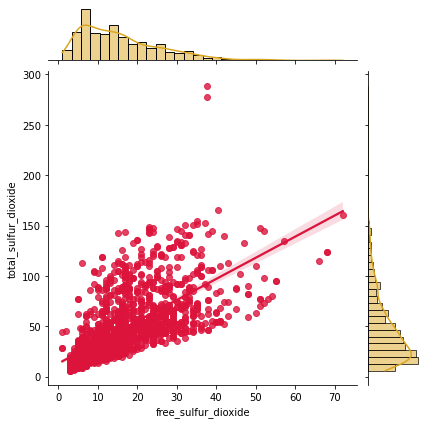

In [24]:
rel_check("free_sulfur_dioxide","total_sulfur_dioxide",red_wine)

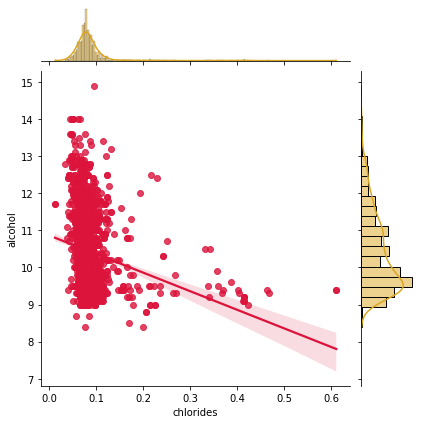

In [25]:
rel_check("chlorides","alcohol",red_wine)

(<AxesSubplot:xlabel='free_sulfur_dioxide', ylabel='quality'>,
 <AxesSubplot:xlabel='free_sulfur_dioxide', ylabel='quality'>)

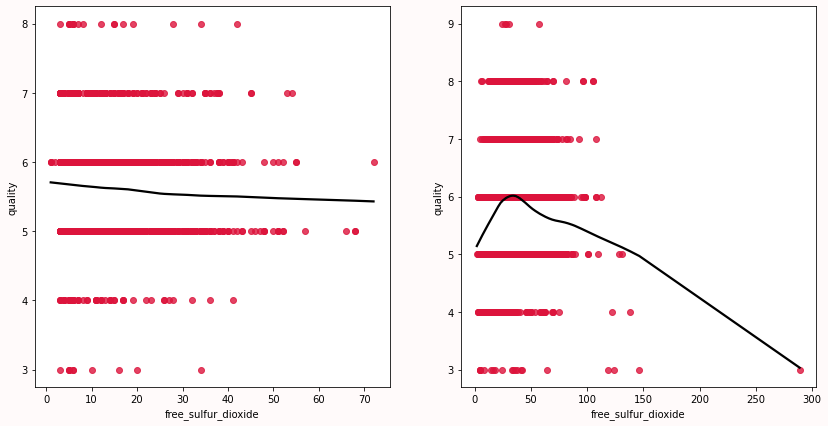

In [26]:
plotter("free_sulfur_dioxide","quality",red_wine,white_wine,False)

(<AxesSubplot:xlabel='chlorides', ylabel='quality'>,
 <AxesSubplot:xlabel='chlorides', ylabel='quality'>)

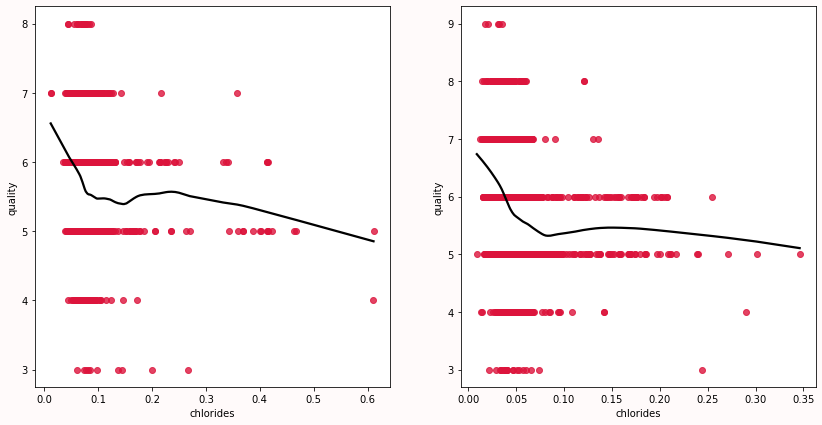

In [27]:
plotter("chlorides","quality",red_wine,white_wine,False)

(<AxesSubplot:xlabel='volatile_acidity', ylabel='quality'>,
 <AxesSubplot:xlabel='volatile_acidity', ylabel='quality'>)

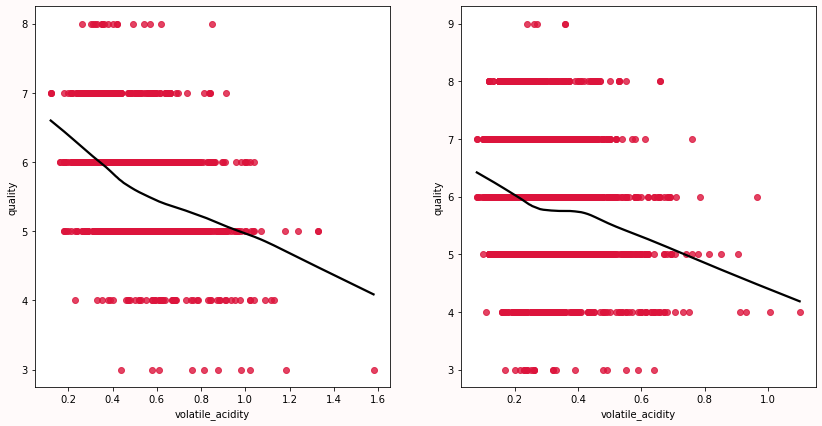

In [28]:
plotter("volatile_acidity","quality",red_wine,white_wine,False)

(<AxesSubplot:xlabel='alcohol', ylabel='quality'>,
 <AxesSubplot:xlabel='alcohol', ylabel='quality'>)

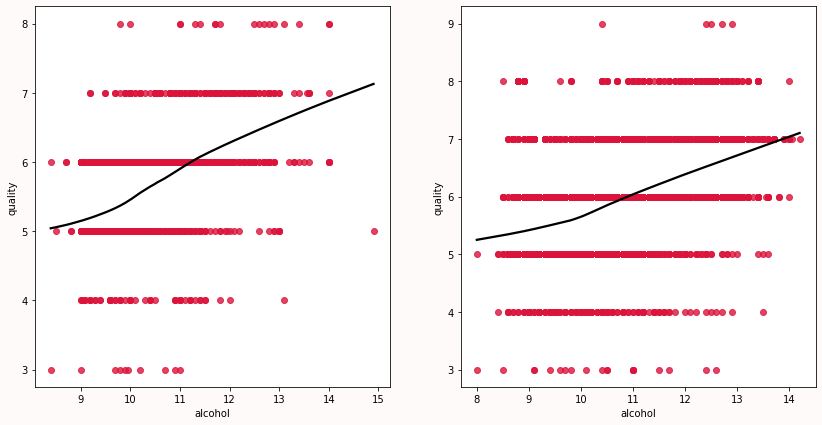

In [29]:
plotter("alcohol","quality",red_wine,white_wine,False)